### Tanmay Bhatt
### 011499072
CMPE 258 <br />
Mid term exam - 1 <br />
Date: 03/10/2018 <br />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import uniform, seed

## 1. (30pts) Define functions
Please define the following functions.
One-hot encoding
Activation function(s)
Forward propagation with regularization
Backward propagation with regularization
Gradient descent with regularization
Softmax

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
def ReLU(z):
    return abs(z) * (z > 0)

In [4]:
def sigmoid_derivative(a):
    return a * (1-a)

In [5]:
def softmax(z):
    ez = np.exp(z)
    return (ez/np.sum(ez,axis=1).reshape(-1,1))

In [6]:
def forward_pass(X_mat):
    
    global neural_dict
    W1 = neural_dict['W1']
    W2 = neural_dict['W2']
    W3 = neural_dict['W3']
    B1 = neural_dict['B1']
    B2 = neural_dict['B2']
    B3 = neural_dict['B3']

    '''Layer 1'''
    z1 = np.dot(X_mat,W1.T).T + B1
    a1 = sigmoid(z1)
    
    '''Layer 2'''
    z2 = np.dot(W2, a1)+ B2
    a2 = sigmoid(z2)
    
    '''Layer 3'''
    z3 = np.dot(W3,a2) + B3
    a3 = sigmoid(z3).T
    neural_dict['a1'] = a1
    neural_dict['a2'] = a2
    neural_dict['a3'] = a3

In [7]:
def backward_pass():
    
    m = X_train.shape[0]
    W1 = neural_dict['W1']
    W2 = neural_dict['W2']
    W3 = neural_dict['W3']
    B1 = neural_dict['B1']
    B2 = neural_dict['B2']
    B3 = neural_dict['B3']
    a1 = neural_dict['a1']
    a2 = neural_dict['a2']
    a3 = neural_dict['a3']

    '''Layer 3'''
    dl_dz3 = a3 - Y_train_onehot
    dl_dw3 = np.dot(dl_dz3.T, a2.T)/m
    dl_db3 = np.sum(dl_dz3.T, axis=1, keepdims=True)/m
    
    '''Layer 2'''
    dl_da2 = np.dot(dl_dz3,W3)
    dl_dz2 = np.multiply(dl_da2.T,sigmoid_derivative(a2))
    dl_dw2 = np.dot(dl_dz2, a1.T)/m
    dl_db2 = np.sum(dl_dz2, axis=1, keepdims=True)/m
    
    '''Layer 1'''
    dl_da1 = np.dot(dl_dz2.T, W2)
    dl_dz1 = np.multiply(dl_da1.T,sigmoid_derivative(a1))
    dl_dw1 = np.dot(dl_dz1, X_train)/m
    dl_db1 = np.sum(dl_dz1, axis=1, keepdims=True)/m
    
    return dl_dw1, dl_dw2, dl_dw3, dl_db1, dl_db2, dl_db3

In [8]:
def one_hot_encoding(mat):
    list_of_list = []
    for i in range(0,len(mat)):
        small_list = np.zeros(np.max(mat)+1)
        small_list[mat[i]] = 1
        list_of_list.append(small_list)
    result = np.array(list_of_list)
    return result

In [9]:
def calculate_loss():
    a = neural_dict['a3']
    return (np.multiply(Y_train_onehot,np.log(a)) + np.multiply((1-Y_train_onehot),np.log(1-a)))

In [10]:
def calculate_cost():
    m = X_train.shape[0]
    cost = -np.sum(calculate_loss())
    return cost/m

In [11]:
"""
Predicting results by performing Softmax on the result of forward pass on the testing data
"""

def predict(X_max):
    global neural_dict
    forward_pass(X_max)
    sof = softmax(neural_dict['a3'])
    prediction = []
    for i in sof:
        prediction.append(np.argmax(i))
    return prediction

In [12]:
'''Expects python - list of actual and predicted results'''

def calculate_accuracy(actual,predicted):
    count = 0.0
    for i in range(0,len(actual)):
        if predicted[i] == actual[i]:
            count+= 1
    return count/len(actual)

In [13]:
def gradient_descent(X_train,learning_rate=1,iterations=1000):
   
    global plot_object
    global neural_dict
    
    neural_dict['W1'] = W1
    neural_dict['W2'] = W2
    neural_dict['W3'] = W3
    neural_dict['B1'] = B1
    neural_dict['B2'] = B2
    neural_dict['B3'] = B3

    all_costs = []
    count = 0
    forward_pass(X_train)
    new_cost = calculate_cost()
    current_cost = float("inf")
    while new_cost < current_cost and count < iterations:
        all_costs.append(new_cost)
        count += 1        
        dl_dw1, dl_dw2, dl_dw3, dl_db1, dl_db2, dl_db3 = backward_pass()
        
        neural_dict['W1'] = neural_dict['W1'] - (learning_rate * dl_dw1)
        neural_dict['W2'] = neural_dict['W2'] - (learning_rate * dl_dw2)
        neural_dict['W3'] = neural_dict['W3'] - (learning_rate * dl_dw3)

        neural_dict['B1'] = neural_dict['B1'] - (learning_rate * dl_db1)
        neural_dict['B2'] = neural_dict['B2'] - (learning_rate * dl_db2)
        neural_dict['B3'] = neural_dict['B3'] - (learning_rate * dl_db3)
        
        current_cost = new_cost
        forward_pass(X_train)
        new_cost = calculate_cost()
        count +=1
    plot_object[learning_rate] = all_costs
    print "Final cost : ",
    print new_cost
    print "Iternations : %d" % count

## 2. Split data
Please split each data (Train & Test) set as input (x) and output (y) set.
Input set is the columns starting 0 to 399.
Output set is the column of ‘y’.

In [14]:
train_data = pd.read_csv("./exam1_train.csv",index_col=0)
test_data = pd.read_csv("./exam1_test.csv",index_col=0)

X_train = train_data.iloc[:,:(train_data.shape[1] -1 )]
X_test =  test_data.iloc[:,:(test_data.shape[1] -1 )]

Y_train = train_data['y']
Y_test =test_data['y']

Y_train_onehot = one_hot_encoding(Y_train)

Y_train = Y_train.tolist()
Y_test = Y_test.tolist()

In [15]:
print "X_train shape",
print X_train.shape
print "X_test shape",
print X_test.shape

X_train shape (3500, 400)
X_test shape (1500, 400)


In [16]:
print "Y_train shape",
print len(Y_train)
print "Y_test shape",
print len(Y_test)

Y_train shape 3500
Y_test shape 1500


In [17]:
plot_object = {}

## 3. (10pts) Initialize parameters
Please initialize weight coefficients and bias terms for each layer properly. You can use any initializing methods as you
wish.

In [18]:
neural_dict = {}

In [19]:
'''
Number of Hidden Neurons is configurable.
'''

hidden_neurons1 = 70
hidden_neurons2 = 40

output_neurons = 10
np.random.seed(1)

W1 = []
for i in range(0,hidden_neurons1):
    sampl = np.random.uniform(low=-1, high=1, size=(X_train.shape[1]))
    W1.append(sampl)

W2 = []
for i in range(0,hidden_neurons2):
    sampl = np.random.uniform(low=-1, high=1, size=(hidden_neurons1))
    W2.append(sampl)
    
W3 = []
for i in range(0,output_neurons):
    sampl = np.random.uniform(low=-1, high=1, size=(hidden_neurons2))
    W3.append(sampl)
    
B1 = []
for i in range(0,hidden_neurons1):
    B1.append([0])
    
B2 = []
for i in range(0,hidden_neurons2):
    B2.append([0])
    
B3 = []
for i in range(0,output_neurons):
    B3.append([0])
    
W1 = np.array(W1)
W2 = np.array(W2)
W3 = np.array(W3)

B1 = np.array(B1)
B2 = np.array(B2)
B3 = np.array(B3)

## 4. (30pts) Deep Neural Network model with more than 2 hidden layers
Please build neural network model using input layer (400 neurons), many (at least two) hidden layers, and output layer (10
neurons) using training data set. For each hidden layer, you can assign many neurons as you wish. For activation functions
and regularization methods, you can use any method as you wish.

In [20]:
neural_dict = {}

In [21]:
learning_rates = [1.2]
for rate in learning_rates:
    gradient_descent(X_train,rate,3500)
    Y_pred = np.array(np.argmax(neural_dict['a3'], axis=1))
    print "Learning rate"
    print "Training accuracy is : %f " % calculate_accuracy(Y_train,Y_pred)
    print

Final cost :  1.79342798345
Iternations : 68
Learning rate
Training accuracy is : 0.725714 



## 5. (10pts) Predictions
Please predict digit using softmax function.
Please calculate accuracy for the prediction using training data set and testing data set

In [22]:
'''
Predicting using softmax
'''

Y_pred_test = predict(X_test)
print "Testing accuracy is : %f " % calculate_accuracy(Y_test,Y_pred_test)

Testing accuracy is : 0.722000 


## 6. (20pts) Optimization
Please optimize your model using various hyper parameters such as number of hidden layer, number of neurons in hidden
layer, activation function, regularization method, initialization method, learning rate, and number of iteration.
Please print out the optimized accuracy for training and testing data set.

In [23]:
'''It could take about 3 minutes'''
'''Reduce number of Iterations - last parameter to gradient descent if it is taking very long. 
   Would hurt the accuracy at the cost of faster result '''

learning_rates = [1.5,0.01,1]
# iterations = [500,1000,5000]
train_results = []
test_results = []
for rate in learning_rates:
    #for it in iterations:
    gradient_descent(X_train,rate,3500)  #,it)
    Y_pred_train = np.array(np.argmax(neural_dict['a3'], axis=1))
    Y_pred_test = predict(X_test)
    train_results.append(calculate_accuracy(Y_train,Y_pred_train))
    test_results.append(calculate_accuracy(Y_test,Y_pred_test))
    print "Learning rate : %f " % rate
    print "Training accuracy : %f " % train_results[-1]
    print "Testing accuracy : %f " % test_results[-1]
    print
    print "************"
    print

Final cost :  2.58990035659
Iternations : 30
Learning rate : 1.500000 
Training accuracy : 0.450571 
Testing accuracy : 0.446667 

************

Final cost :  2.33702542427
Iternations : 3500
Learning rate : 0.010000 
Training accuracy : 0.596000 
Testing accuracy : 0.579333 

************

Final cost :  0.0588784623812
Iternations : 3500
Learning rate : 1.000000 
Training accuracy : 0.998000 
Testing accuracy : 0.913333 

************



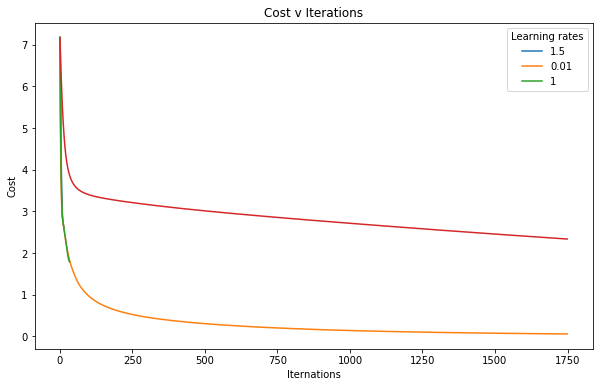

In [24]:
plt.figure(figsize=(10,6))
plt.xlabel('Iternations')
plt.ylabel('Cost')
plt.title("Cost v Iterations")
for key, value in plot_object.items():
    plt.plot(range(0,len(value)),sorted(value,reverse=True),label='Learning rate' + str(key))
plt.legend(learning_rates,title="Learning rates")

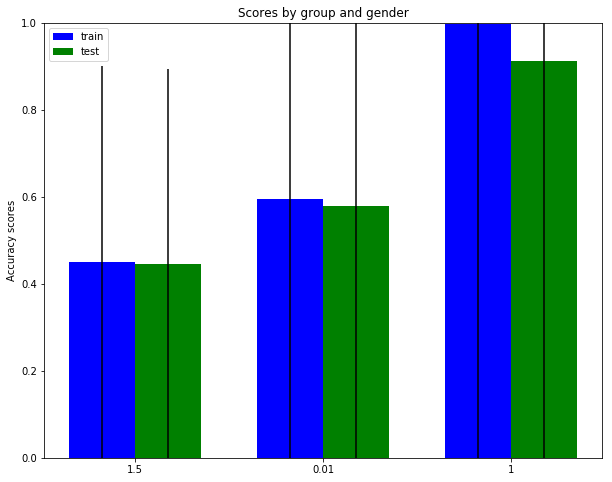

In [25]:
N = len(learning_rates)


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(ind, train_results, width, color='b', yerr=train_results)

rects2 = ax.bar(ind + width, test_results, width, color='g', yerr=test_results)


fig.set_figheight(8)
fig.set_figwidth(10)

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((learning_rates))
ax.set_ylim([0,1])

ax.legend((rects1[0], rects2[0]), ('train', 'test'))

plt.show()

## Noticed an inverse co-relation between number of neurons and accuracy

### Increasing number of neurons results in lower accuracy

1. hidden_neurons1 = 100   hidden_neurons2 = 50    training accuracy = 0.927333
2. hidden_neurons1 = 200   hidden_neurons2 = 100   training accuracy = 0.432667 
3. hidden_neurons1 = 400   hidden_neurons2 = 200   training accuracy = 0.102667
3. hidden_neurons1 = 200   hidden_neurons2 = 300   training accuracy = 0.090667 
4. hidden_neurons1 = 70    hidden_neurons2 = 40    training accuracy = 0.998000